In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from arch import arch_model
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

import warnings

## Pre-processing

In [75]:
df_ohlc = pd.read_csv('data/SOL_1d_data.csv', parse_dates=True, index_col=0)
df_ohlc.head()

,open,high,low,close,volume,vwap,transactions
timestamp,,,,,,,
2023-12-30,106.16,107.59,100.69,101.92,1.035264e+06,103.4447,85673
2023-12-31,101.91,105.28,99.29,101.84,1.402462e+06,102.5917,96682
2024-01-01,101.70,110.44,101.47,110.11,1.626238e+06,105.8227,108681
2024-01-02,109.90,117.03,106.00,106.74,2.735153e+06,111.1942,200857
2024-01-03,106.77,110.04,71.00,98.59,4.241949e+06,99.1378,276745


In [76]:
df_FED = pd.read_csv('data/FED_data.csv', parse_dates=True, index_col=0)
df_FED.head()

,FEDFUNDS,CPIAUCSL
2023-12-30,5.33,309.794
2023-12-31,5.33,309.794
2024-01-01,5.33,309.794
2024-01-02,5.33,311.022
2024-01-03,5.33,311.022


In [77]:
df = pd.concat([df_ohlc, df_FED], axis=1)
df.head()

,open,high,low,close,volume,vwap,transactions,FEDFUNDS,CPIAUCSL
2023-12-30,106.16,107.59,100.69,101.92,1.035264e+06,103.4447,85673,5.33,309.794
2023-12-31,101.91,105.28,99.29,101.84,1.402462e+06,102.5917,96682,5.33,309.794
2024-01-01,101.70,110.44,101.47,110.11,1.626238e+06,105.8227,108681,5.33,309.794
2024-01-02,109.90,117.03,106.00,106.74,2.735153e+06,111.1942,200857,5.33,311.022
2024-01-03,106.77,110.04,71.00,98.59,4.241949e+06,99.1378,276745,5.33,311.022


## Analysis

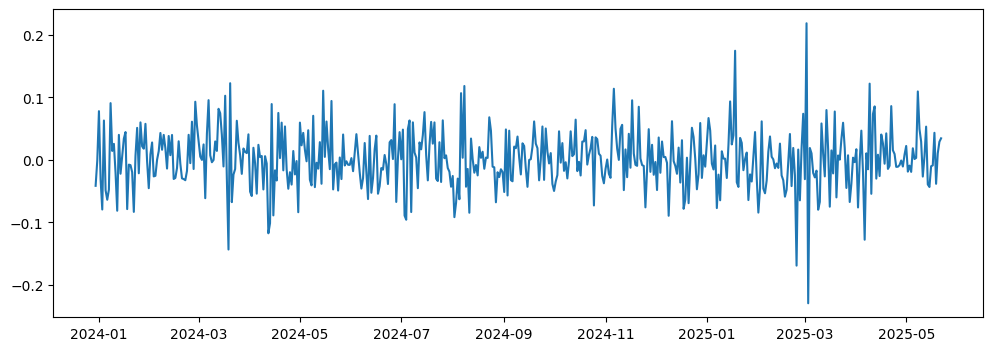

In [31]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
ax.plot(x)
plt.show()

In [32]:
model = arch_model(x, mean='Zero', vol='GARCH', p=1, q=1, rescale=False)
res = model.fit(update_freq=5, disp='off')
print(res.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:                857.341
Distribution:                  Normal   AIC:                          -1708.68
Method:            Maximum Likelihood   BIC:                          -1695.98
                                        No. Observations:                  510
Date:                Sun, Dec 28 2025   Df Residuals:                      510
Time:                        20:26:39   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.8596e-04  1.580e-04      2.442  1.459e-02 [7.